In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("Visualisation").getOrCreate()

In [3]:
spark

In [4]:
df = spark.read.csv("sales_info.csv", header=True, inferSchema=True)

In [5]:
df.show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|    Sam|200.0|
|   GOOG|Charlie|120.0|
|   GOOG|  Frank|340.0|
|   MSFT|   Tina|600.0|
|   MSFT|    Amy|124.0|
|   MSFT|Vanessa|243.0|
|     FB|   Carl|870.0|
|     FB|  Sarah|350.0|
|   APPL|   John|250.0|
|   APPL|  Linda|130.0|
|   APPL|   Mike|750.0|
|   APPL|  Chris|350.0|
+-------+-------+-----+



In [6]:
df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Person: string (nullable = true)
 |-- Sales: double (nullable = true)



In [7]:
df.describe().show()

+-------+-------+-------+------------------+
|summary|Company| Person|             Sales|
+-------+-------+-------+------------------+
|  count|     12|     12|                12|
|   mean|   NULL|   NULL| 360.5833333333333|
| stddev|   NULL|   NULL|250.08742410799007|
|    min|   APPL|  Chris|             120.0|
|    max|   MSFT|Vanessa|             870.0|
+-------+-------+-------+------------------+



In [8]:
df.groupBy('Company').sum('Sales').show()

+-------+----------+
|Company|sum(Sales)|
+-------+----------+
|   APPL|    1480.0|
|   GOOG|     660.0|
|     FB|    1220.0|
|   MSFT|     967.0|
+-------+----------+



In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df_pandas = df.toPandas()

In [11]:
df_pandas

,Company,Person,Sales
0,GOOG,Sam,200.0
1,GOOG,Charlie,120.0
2,GOOG,Frank,340.0
3,MSFT,Tina,600.0
4,MSFT,Amy,124.0
5,MSFT,Vanessa,243.0
6,FB,Carl,870.0
7,FB,Sarah,350.0
8,APPL,John,250.0
9,APPL,Linda,130.0


In [12]:
fig = plt.figure(figsize=(5,2))

<Figure size 500x200 with 0 Axes>

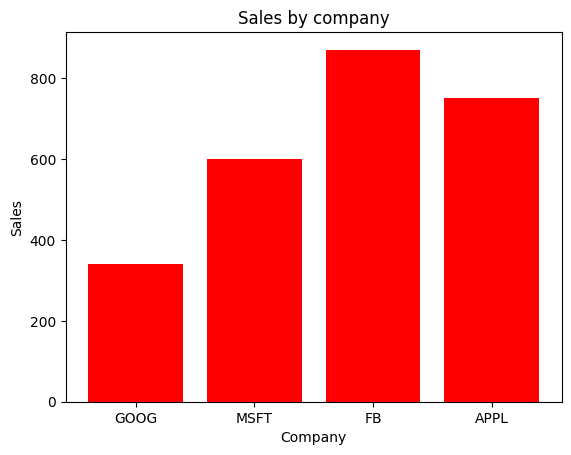

In [ ]:
plt.bar(df_pandas["Company"], df_pandas["Sales"], color="red")
plt.xlabel("Company")
plt.ylabel("Sales")
plt.title("Sales by company")
plt.show()

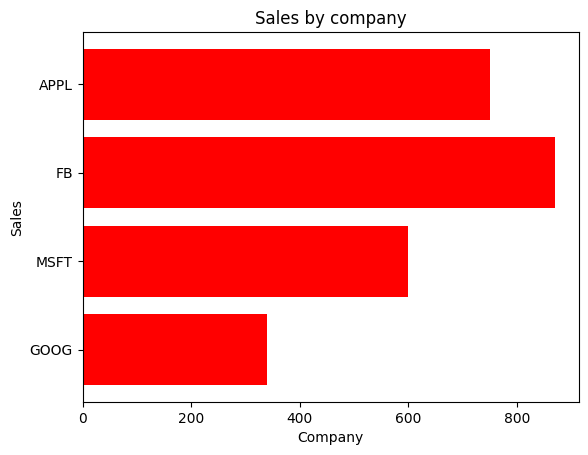

In [31]:
plt.barh(df_pandas["Company"], df_pandas["Sales"], color="red")
plt.xlabel("Company")
plt.ylabel("Sales")
plt.title("Sales by company")
plt.show()

In [32]:
df2 = spark.read.csv("appl_stock.csv", header=True, inferSchema=True)

In [33]:
df2_pd = df2.toPandas()

In [36]:
fig2 = plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

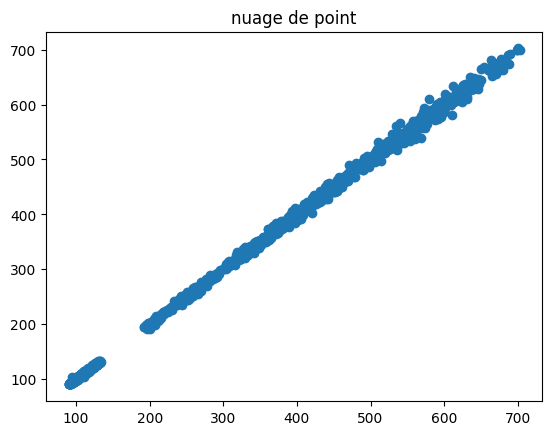

In [41]:
plt.scatter(df2_pd['Open'], df2_pd['Close'])
plt.title('nuage de point')
plt.show()

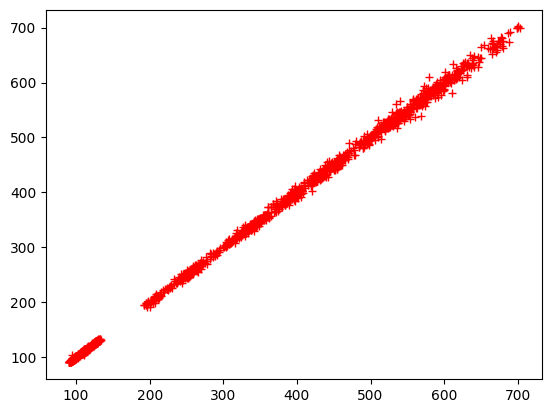

In [42]:
plt.plot(df2_pd['Open'], df2_pd['Close'], linestyle="none", marker="+", color="red")
plt.show()

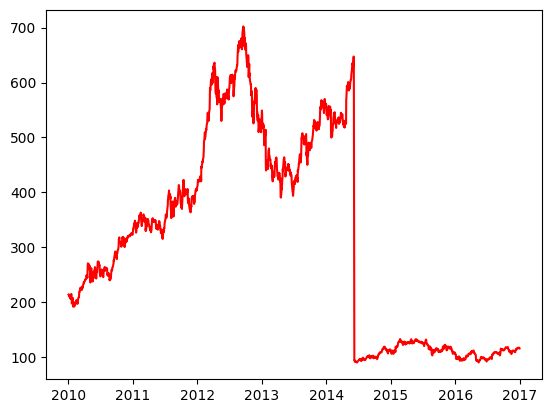

In [43]:
plt.plot(df2_pd['Date'], df2_pd['Close'], color="red")
plt.show()

In [44]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie